In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
 # Importing the dataset containing optical clusters
# df = pd.read_csv('../data/new/awd_not_psz.csv', skiprows = 0, index_col=0)
# df['intensity100'] = np.loadtxt('../data/new/planck_100_rv2_1.csv',delimiter=', ')
# df['intensity143'] = np.loadtxt('../data/new/planck_143_rv1_1.csv',delimiter=', ')
# df['intensity217'] = np.loadtxt('../data/new/planck_217_rv0_1.csv',delimiter=', ')
# df['intensity353'] = np.loadtxt('../data/new/planck_353_2_1.csv',delimiter=', ')
# df['intensity545'] = np.loadtxt('../data/new/planck_545_1_1.csv',delimiter=', ')
# df['intensity857'] = np.loadtxt('../data/new/planck_857_0_1.csv',delimiter=', ')
# df['intensity090_act'] = np.loadtxt('../data/new/act_090_real.csv',delimiter=', ')
# df['intensity150_act'] = np.loadtxt('../data/new/act_150_real.csv',delimiter=', ')
# df['intensity220_act'] = np.loadtxt('../data/new/act_220_real.csv',delimiter=', ')
# df['intensity_rosat'] = np.loadtxt('../data/new/rosat_real.csv',delimiter=', ')
# df['cluster'] = 1

df = pd.read_csv('../data/ml_sample_real.csv', skiprows = 0, index_col=0)
df['intensity100'] = np.loadtxt('../data/beam/real_planck_100.csv',delimiter=', ')
df['intensity143'] = np.loadtxt('../data/beam/real_planck_143.csv',delimiter=', ')
df['intensity217'] = np.loadtxt('../data/beam/real_planck_217.csv',delimiter=', ')
df['intensity353'] = np.loadtxt('../data/beam/real_planck_353.csv',delimiter=', ')
df['intensity545'] = np.loadtxt('../data/beam/real_planck_545.csv',delimiter=', ')
df['intensity857'] = np.loadtxt('../data/beam/real_planck_857.csv',delimiter=', ')
df['intensity090_act'] = np.loadtxt('../data/beam/real_act_090.csv',delimiter=', ')
df['intensity150_act'] = np.loadtxt('../data/beam/real_act_150.csv',delimiter=', ')
df['intensity220_act'] = np.loadtxt('../data/beam/real_act_220.csv',delimiter=', ')
df['intensity_rosat'] = np.loadtxt('../data/beam/real_rosat.csv',delimiter=', ')

df.head()

,amf_z,amf_rh,glat,glon,amf_sn,intensity100,intensity857,intensity143,intensity353,cluster,intensity217,intensity545,intensity090_act,intensity150_act,intensity220_act,intensity_rosat
0,0.2252,200.7117,31.846666,55.602221,24.655148,-0.000010,-0.710562,0.000003,0.001123,1,0.000151,-0.228087,-9999.0,-9999.0,-9999.0,0.175387
1,0.2248,182.3373,41.429880,72.599428,44.674799,-0.000179,-1.489469,-0.000166,0.000744,1,-0.000031,-0.471316,-9999.0,-9999.0,-9999.0,0.154070
2,0.3110,179.1883,65.305106,107.103759,25.696075,-0.000045,-1.691982,-0.000044,0.000596,1,-0.000027,-0.544914,-9999.0,-9999.0,-9999.0,0.080504
3,0.5231,174.7108,-29.646780,100.211077,13.793623,0.000058,2.181829,0.000071,0.001951,1,0.000297,0.710477,-9999.0,-9999.0,-9999.0,0.042015
4,0.2574,172.6889,43.387615,166.090009,20.839521,0.000034,-1.603565,0.000056,0.000845,1,0.000182,-0.493595,-9999.0,-9999.0,-9999.0,0.142775


In [27]:
df2 = df.copy()
df2 = pd.concat([df2,df2,df2])
df2[:] = 0
df2 = df2[:len(np.loadtxt('../../../ras_planck_voidsx.csv',delimiter=', '))].reset_index(drop=True)
len(df2)

ras = np.loadtxt('../../../ras_planck_voidsx.csv',delimiter=', ')
decs = np.loadtxt('../../../decs_planck_voidsx.csv',delimiter=', ')
c = SkyCoord(ras,decs,frame='icrs',unit='deg')
glats = np.array(c.galactic.b.degree)
glons = np.array(c.galactic.l.degree)

df2['glon'] = glons
df2['glat'] = glats
df2['intensity100'] = np.loadtxt('../../../planck_voidsx_100.csv',delimiter=', ')
df2['intensity143'] = np.loadtxt('../../../planck_voidsx_143.csv',delimiter=', ')
df2['intensity217'] = np.loadtxt('../../../planck_voidsx_217.csv',delimiter=', ')
df2['intensity353'] = np.loadtxt('../../../planck_voidsx_353.csv',delimiter=', ')
df2['intensity545'] = np.loadtxt('../../../planck_voidsx_545.csv',delimiter=', ')
df2['intensity857'] = np.loadtxt('../../../planck_voidsx_857.csv',delimiter=', ')
df2['intensity090_act'] = np.loadtxt('../../../090_voids_test.csv',delimiter=', ')
df2['intensity150_act'] = np.loadtxt('../../../150_voids_test.csv',delimiter=', ')
df2['intensity220_act'] = np.loadtxt('../../../220_voids_test.csv',delimiter=', ')
df2['intensity_rosat'] = np.loadtxt('../../../rosat_voids_test.csv',delimiter=', ')

In [29]:
df2[df2.intensity090_act!=-9999]

,amf_z,amf_rh,glat,glon,amf_sn,intensity100,intensity857,intensity143,intensity353,cluster,intensity217,intensity545,intensity090_act,intensity150_act,intensity220_act,intensity_rosat
2,0,0,-54.370747,173.966928,0,0.000079,-0.061013,0.000064,0.000520,0,0.000084,-0.043621,-2.231562,-8.360910,-289.415178,-1.989388e-06
3,0,0,35.995232,11.398584,0,0.000189,2.067398,0.000232,0.003227,0,0.000541,0.617259,29.108621,37.671178,48.920785,-8.713710e-06
4,0,0,-30.173559,83.214999,0,0.000070,0.074664,0.000049,0.000968,0,0.000126,0.018953,0.011064,-14.104517,-180.448670,-2.108861e-06
5,0,0,-50.569188,107.107303,0,0.000115,0.799317,0.000097,0.001719,0,0.000271,0.263552,-9.252477,-109.609221,-259.106424,6.481026e-07
7,0,0,-34.430390,159.173963,0,0.000639,46.609227,0.000697,0.025173,0,0.003598,17.107285,159.362340,242.583612,57.382831,-2.083976e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47225,0,0,-25.835778,206.290276,0,0.000108,3.253267,0.000173,0.004054,0,0.000599,1.260920,138.772103,88.038363,-94.901085,-3.802323e-07
47226,0,0,-42.301289,170.789111,0,0.000263,3.582744,0.000338,0.006015,0,0.000971,1.183941,85.750441,-7.361128,-355.738625,4.558190e-04
47228,0,0,35.664555,206.569321,0,0.000326,0.060714,0.000201,0.000908,0,0.000261,0.021621,182.833237,220.565204,-70.920555,1.923947e-07
47229,0,0,32.822049,228.322188,0,0.000159,0.089947,0.000150,0.000945,0,0.000292,0.065196,915.982464,441.969798,-202.261381,-4.180878e-06


In [30]:
# Importing the dataset containing non-clusters
# df2 = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
# df2['intensity100'] = np.loadtxt('../data/beam/fake_planck_100.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../data/beam/fake_planck_143.csv',delimiter=', ')
# df2['intensity217'] = np.loadtxt('../data/beam/fake_planck_217.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../data/beam/fake_planck_353.csv',delimiter=', ')
# df2['intensity545'] = np.loadtxt('../data/beam/fake_planck_545.csv',delimiter=', ')
# df2['intensity857'] = np.loadtxt('../data/beam/fake_planck_857.csv',delimiter=', ')
# df2['intensity090_act'] = np.loadtxt('../data/beam/fake_act_090.csv',delimiter=', ')
# df2['intensity150_act'] = np.loadtxt('../data/beam/fake_act_150.csv',delimiter=', ')
# df2['intensity220_act'] = np.loadtxt('../data/beam/fake_act_220.csv',delimiter=', ')
# df2['intensity_rosat'] = np.loadtxt('../data/beam/fake_rosat.csv',delimiter=', ')

# df2 = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
# df2['intensity100'] = np.loadtxt('../data/new/planck_100_rv2_0.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../data/new/planck_143_rv1_0.csv',delimiter=', ')
# df2['intensity217'] = np.loadtxt('../data/new/planck_217_rv0_0.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../data/new/planck_353_2_0.csv',delimiter=', ')
# df2['intensity545'] = np.loadtxt('../data/new/planck_545_1_0.csv',delimiter=', ')
# df2['intensity857'] = np.loadtxt('../data/new/planck_857_0_0.csv',delimiter=', ')
# df2['intensity090_act'] = np.loadtxt('../data/new/act_090_voids.csv',delimiter=', ')
# df2['intensity150_act'] = np.loadtxt('../data/new/act_150_voids.csv',delimiter=', ')
# df2['intensity220_act'] = np.loadtxt('../data/new/act_220_voids.csv',delimiter=', ')
# df2['intensity_rosat'] = np.loadtxt('../data/new/rosat_voids.csv',delimiter=', ')


# df2.head()

In [31]:
# Combine real and fake data
df3 = df.append(df2, ignore_index=True)

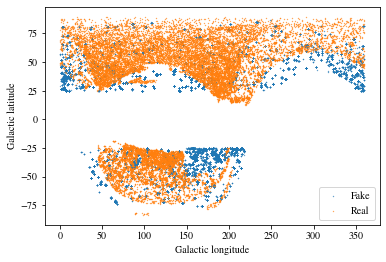

In [32]:
plt.scatter(df2['glon'],df2['glat'],s=0.1,label='Fake')
plt.scatter(df['glon'],df['glat'],s=0.1,label='Real')
plt.xlabel("Galactic longitude")
plt.ylabel("Galactic latitude")
plt.legend()

---

# Classification of clusters vs non clusters

In [33]:
#################################################################################################

# ACT+High Frequency Planck only
intensity_clusters_act = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

####################################################

# Planck low-freq
intensity_clusters_pl_low = df[['intensity100','intensity143','intensity217','intensity353']][::2]
intensity_voids_pl_low = df2[['intensity100','intensity143','intensity217','intensity353']][::2]
intensity_combined_pl_low = df3[['intensity100','intensity143','intensity217','intensity353']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
intensity_voids_pl = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
intensity_combined_pl = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
intensity_voids_pl_act = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
intensity_combined_pl_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
cluster_tag_pl_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
intensity_voids_pl_ros = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
intensity_combined_pl_ros = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

########################################################################################################

# Full
intensity_clusters_full = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
intensity_voids_full = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
intensity_combined_full = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
cluster_tag_full = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [34]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090, i150, i220, i545, i857 in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

In [35]:
# ACT-only
no_cluster_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090, i150, i220, i545, i857 in intensity_voids_act[1::2].values]).flatten()

# # Low-freq Planck
no_cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_voids_pl_low[1::2].values]).flatten()

# Planck-only
no_cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_voids_pl[1::2].values]).flatten()

# Planck+ACT
no_cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_voids_pl_act[1::2].values]).flatten()

# Planck+ROSAT
no_cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_voids_pl_ros[1::2].values]).flatten()

# Full
no_cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_voids_full[1::2].values]).flatten()

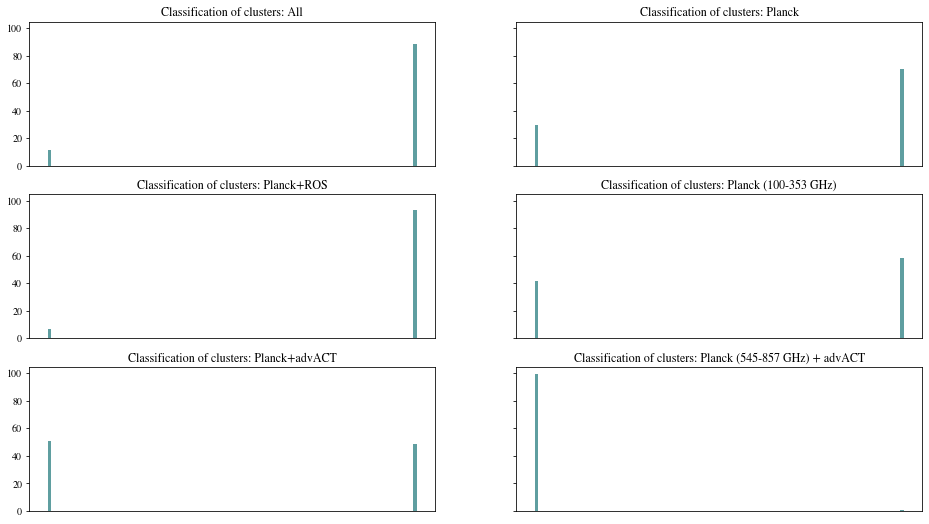

In [36]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: Planck (545-857 GHz) + advACT")

plt.savefig('class_clusters.png')
plt.show()

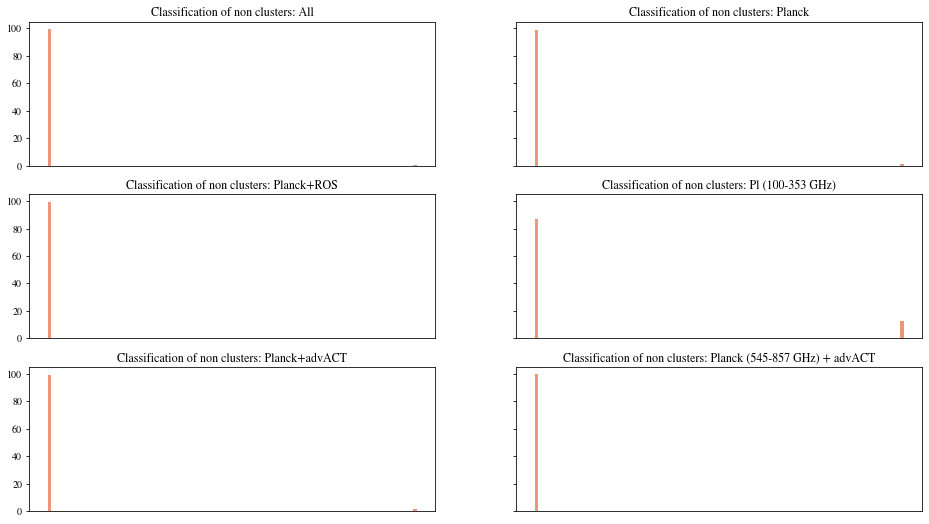

In [37]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(no_cluster_full,bins=100,range=(0,1),color='darksalmon',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of non clusters: All")

ax[1,0].hist(no_cluster_pl_ros,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of non clusters: Planck+ROS")

ax[2,0].hist(no_cluster_pl_act,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of non clusters: Planck+advACT")

ax[0,1].hist(no_cluster_pl,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of non clusters: Planck")

ax[1,1].hist(no_cluster_pl_low,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of non clusters: Pl (100-353 GHz)")

ax[2,1].hist(no_cluster_act,bins=100,range=(0,1),color='darksalmon',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of non clusters: Planck (545-857 GHz) + advACT")

plt.savefig('class_nonclusters.png')
plt.show()

---

# Identification of clusters

In [11]:
# Csv importer wrapped in a function that can be mapped for parallelization
def read_csv(filename):
    return pd.DataFrame(np.loadtxt(filename,delimiter=', ')).T

In [67]:
fsky = pd.DataFrame()
fsky['ras'] = np.loadtxt('../data/new/ras_voids_plfsky.csv',delimiter=', ')
fsky['decs'] = np.loadtxt('../data/new/decs_voids_plfsky.csv',delimiter=', ')

# Convert the RA and DEC to galactic coordinates
c = SkyCoord(fsky['ras'],fsky['decs'],frame='icrs',unit='deg')
fsky['glat'] = c.galactic.b.degree
fsky['glon'] = c.galactic.l.degree

In [71]:
fsky['int100'] = np.loadtxt('../data/new/_planck_fsky_100.csv',delimiter=', ')
fsky['int143'] = np.loadtxt('../data/new/_planck_fsky_143.csv',delimiter=', ')
fsky['int217'] = np.loadtxt('../data/new/_planck_fsky_217.csv',delimiter=', ')
fsky['int353'] = np.loadtxt('../data/new/_planck_fsky_353.csv',delimiter=', ')
fsky['int545'] = np.loadtxt('../data/new/_planck_fsky_545.csv',delimiter=', ')
fsky['int857'] = np.loadtxt('../data/new/_planck_fsky_857.csv',delimiter=', ')
fsky['int090'] = np.loadtxt('../data/new/_act_090_fsky.csv',delimiter=', ')
fsky['int150'] = np.loadtxt('../data/new/_act_150_fsky.csv',delimiter=', ')
fsky['int220'] = np.loadtxt('../data/new/_act_220_fsky.csv',delimiter=', ')
fsky['introsat'] = np.loadtxt('../data/new/_rosat_voids.csv',delimiter=', ')

In [72]:
fsky

,ras,decs,glat,glon,int100,int143,int217,int353,int545,int857,int090,int150,int220,introsat
0,0.000000,-90.000000,-27.128252,302.931925,-0.000076,-0.000041,0.002477,-9999.000000,-9999.000000,0.000203,-9999.000000,-9999.000000,-9999.000000,0.000281
1,3.636364,-90.000000,-27.128252,302.931925,-0.000076,-0.000041,0.002478,-9999.000000,-9999.000000,0.000203,-9999.000000,-9999.000000,-9999.000000,0.000279
2,7.272727,-90.000000,-27.128252,302.931925,-0.000077,-0.000041,0.002479,-9999.000000,-9999.000000,0.000203,-9999.000000,-9999.000000,-9999.000000,0.000274
3,10.909091,-90.000000,-27.128252,302.931925,-0.000077,-0.000041,0.002480,-9999.000000,-9999.000000,0.000204,-9999.000000,-9999.000000,-9999.000000,0.000266
4,14.545455,-90.000000,-27.128252,302.931925,-0.000077,-0.000041,0.002480,-9999.000000,-9999.000000,0.000204,-9999.000000,-9999.000000,-9999.000000,0.000259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99374,127.748824,59.007664,35.715368,158.052303,-0.000007,0.000022,0.001439,-0.060774,-0.132334,0.000167,-9999.000000,-9999.000000,-9999.000000,0.000121
99375,329.757302,-2.098124,-41.764542,56.658408,0.000092,0.000121,0.001866,-0.141595,-0.411958,0.000281,-41.249003,-25.581526,-352.239488,0.000414
99376,352.248683,1.881221,-54.845756,85.266691,-0.000042,-0.000056,0.000864,0.017645,0.051443,0.000030,-34.299681,29.084157,26.187905,0.000103
99377,352.754916,28.190396,-31.413769,102.138803,0.000144,0.000166,0.001607,0.061145,0.114746,0.000329,-9999.000000,-9999.000000,-9999.000000,0.000098


In [74]:
# All
cluster_prob_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220', 'introsat']].values]).flatten()

# Planck+ROSAT
cluster_prob_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'introsat']].values]).flatten()

# Planck+ACT
cluster_prob_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i150]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220']].values]).flatten()

# Planck-only
cluster_prob_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in fsky[['int100','int143','int217','int353', 'int545', 'int857']].values]).flatten()

# # ACT-only
cluster_prob_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090,i150,i220,i545,i857 in fsky[['int090','int150','int220', 'int545', 'int857']].values]).flatten()

# Low-freq Planck
cluster_prob_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in fsky[['int100','int143','int217','int353']].values]).flatten()

In [86]:
voids = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
ras_voids = voids['amf_ra'].reset_index(drop=True)
decs_voids = voids['amf_dec'].reset_index(drop=True)

real = pd.read_csv('../data/ard_not_adv.csv',skiprows=0,index_col=0)
ras_real = real['amf_ra'].reset_index(drop=True)
decs_real = real['amf_dec'].reset_index(drop=True)

In [94]:
fsky[fsky.glon.isin(real['glon'].values)]

,ras,decs,glat,glon,int100,int143,int217,int353,int545,int857,int090,int150,int220,introsat
60000,260.6324,32.1398,31.846666,55.602221,-0.000010,0.000003,0.001123,0.061278,0.114033,0.000151,-9999.000000,-9999.000000,-9999.000000,0.007015
60001,250.1485,46.6917,41.429880,72.599428,-0.000179,-0.000166,0.000744,0.039688,0.015926,-0.000031,-9999.000000,-9999.000000,-9999.000000,0.006163
60004,139.4938,51.7236,43.387615,166.090009,0.000034,0.000056,0.000845,0.040169,0.003339,0.000182,-9999.000000,-9999.000000,-9999.000000,0.005711
60006,11.5934,20.4852,-42.370761,121.326519,-0.000093,-0.000067,0.000865,0.027203,0.124429,0.000056,-18.199354,-41.078313,82.719343,0.000769
60007,203.8354,41.0006,73.444772,92.647549,-0.000092,-0.000088,0.000610,0.019979,-0.016407,0.000006,-9999.000000,-9999.000000,-9999.000000,0.005219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81001,117.7965,28.4314,24.760679,192.272829,-0.000076,-0.000067,0.000655,0.013666,-0.003249,0.000005,-9999.000000,-9999.000000,-9999.000000,0.000231
81002,10.2234,16.4729,-46.323866,119.270217,-0.000061,-0.000050,0.000773,-0.071042,-0.176342,0.000017,-46.644374,60.377551,132.253393,0.000367
81003,332.5373,16.8053,-31.180104,76.542726,-0.000124,-0.000117,0.000708,-0.019680,0.013631,-0.000040,-37.075561,-114.912083,45.904536,0.000061
81004,321.0614,-5.5885,-36.312474,46.861993,0.000242,0.000257,0.001575,-0.062441,-0.266303,0.000409,157.976945,125.895655,-199.270413,0.000142


In [95]:
fsky['cluster_full'] = cluster_prob_full
fsky['cluster_pl_ros'] = cluster_prob_pl_ros
fsky['cluster_pl_act'] = cluster_prob_pl_act
fsky['cluster_pl'] = cluster_prob_pl
fsky['cluster_pl_low'] = cluster_prob_pl_low
fsky['cluster_act'] = cluster_prob_act

In [96]:
pl143 = hp.read_map('../data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


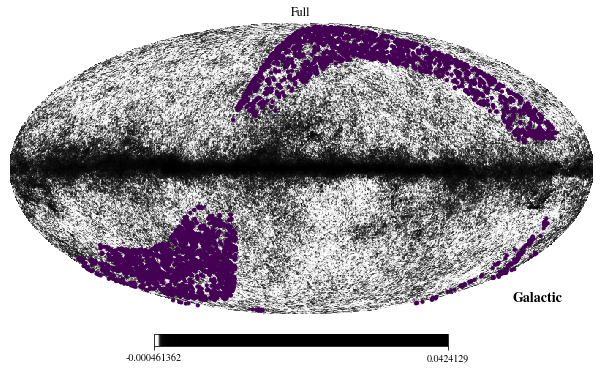

In [101]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Full')
hp.visufunc.projscatter(fsky[(fsky.glon.isin(real['glon'].values)) & (fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.glon.isin(real['glon'].values)) &(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.glon.isin(real['glon'].values)) &(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_full'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl+ROS')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl_ros,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl+ACT')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_pl_act'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl (100-353)')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl_low,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='ACT')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_act'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)